# Opioids Project: Data Science Memo

Ra'Kira Nelson and Alexa Fahrer

In [1]:
import nbconvert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

opioids_prescriptions = pd.read_csv("data/opioids_clean.csv")
opioids_prescriptions = opioids_prescriptions.copy()
opioids_prescriptions = opioids_prescriptions.drop(columns=["Unnamed: 0"])

opioids_deaths = pd.read_csv("data/opioids_deaths.csv")
opioids_deaths = opioids_deaths.copy()
opioids_deaths = opioids_deaths.drop(columns=["Unnamed: 0"])

In [2]:
# control states for prescription shipments: Delaware, New Mexico
control_states_prescriptions = [
    "DELAWARE",
    "NEW MEXICO",
]
opioids_states_prescriptions = opioids_prescriptions[
    opioids_prescriptions["state"].isin(control_states_prescriptions + ["FLORIDA"])
]

# control states for overdoses: Colorado, Michigan, Nevada
control_states_od = [
    "COLORADO",
    "MICHIGAN",
    "NEVADA",
]
opioids_states_od = opioids_deaths[
    opioids_deaths["state"].isin(control_states_od + ["FLORIDA"])
]

## Stakeholders

This memo is written for Policy Analysts at the Florida Department of Health and the United States Drug Enforcement Agency. The intended reader has strong policy expertise and moderate technical familiarity with public health metrics, but may not necessarily be a data scientist.

## Executive Summary

The United States experienced a rapid rise in opioid shipments and overdose deaths during the late 2000s, and the state of Florida especially became a hotspot for opioid prescriptions and use. To combat this over-prescription issue, Florida enacted a series of major opioid prescribing restrictions starting in 2010. This memo evaluates whether these policies reduced prescription opioid shipments and overdose mortality, using county-level data from 2006 to 2015. We also compare Florida to other states with similar pre-policy opioid prescription and overdose trends to evaluate the effectiveness of the policies.

Our findings show that Florida’s 2010 opioid regulations were associated with a large reduction in prescription opioid shipments, beginning immediately after the policy went into effect. However, overdose deaths declined only temporarily before rising again in later years. This result is consistent with concerns that reducing access to prescription opioids would push some people toward illicit opioids such as heroin or fentanyl. These results suggest that while prescribing policies are effective at reducing the supply of prescription opioids, they must be paired with broader strategies to sustainably reduce overdose deaths.

## Decisions To Be Made

Based on this analysis, the Florida Department of Health faces two decisions:

1. Should Florida continue or expand the regulations targeting high-risk opioid prescribers?

The evidence in this analysis strongly suggests that these measures are effective in reducing opioid prescriptions.

2. Should Florida combine prescribing regulations with other interventions to prevent overdose deaths?

The analysis showed that the policies were not as effective in reducing overdose deaths as they were in reducing opioid prescriptions.

## Background and Research Questions

Over the past two decades, Florida has faced one of the most severe prescription-opioid crises in the United States. Prescription pain medications were both available and misued in high amounts, leading to rising addiction rates and overdose deaths, and a dangerous shift toward illicit opioids such as heroin and fentanyl. Florida became a national epicenter of this crisis: by 2010, 98 of the 100 highest-volume oxycodone-dispensing physicians in the United States were operating in Florida, and hundreds of loosely regulated pain clinics were distributing large quantities of opioids with little medical justification.

For the Florida Department of Health and the Drug Enforcement Agency, this situation presented a clear and urgent policy problem: excessive and inappropriate opioid prescription led to addiction and death. Florida policymakers and state health officials had authority to intervene in the operation of pain clinics, behavior of doctors, and oversight of controlled-substance dispensing.

In response to this problem, Florida implemented regulations beginning in 2010. These included mandatory pain-clinic registration, aggressive multi-agency enforcement operations, restrictions on physician dispensing, establishment of a statewide Prescription Drug Monitoring Program (PDMP), required reporting from dispensers, and expanded regulation of wholesale distributors. Together, these measures were designed to reduce opioid prescribing and availability in Florida.

This memo seeks to understand the effect of Florida's 2010 opioid prescribing regulations on 1) the volume of opioids prescribed, and 2) drug overdose deaths. The central research question is: 
* Did Florida’s 2010 opioid prescribing regulations reduce the volume of opioids and overdose deaths in the state?

By providing a causal estimate of the policies’ impact, this analysis allows the Florida Department of Health and the Drug Enforcement Agency to make informed decisions about continuing, expanding, or changing these interventions.

We hypothesize that the regulations decreased the volume of opioids prescribed but was not as effective at reducing the overall rate of overdose deaths in Florida. 

## Methodology



## Results

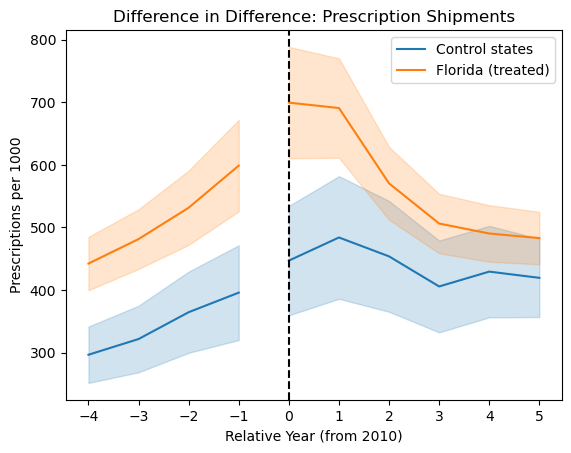

In [3]:
colors = ["tab:blue", "tab:orange"]
pre_prescriptions = opioids_states_prescriptions[
    opioids_states_prescriptions["year"] < 2010
]
post_prescriptions = opioids_states_prescriptions[
    opioids_states_prescriptions["year"] >= 2010
]

pre_prescription_trends = (
    pre_prescriptions.groupby(["policy_state", "relative_year"])[
        "prescriptions_per_1000"
    ]
    .agg(["mean", "std", "count"])
    .reset_index()
)
pre_prescription_trends["se"] = pre_prescription_trends["std"] / np.sqrt(
    pre_prescription_trends["count"]
)

post_prescription_trends = (
    post_prescriptions.groupby(["policy_state", "relative_year"])[
        "prescriptions_per_1000"
    ]
    .agg(["mean", "std", "count"])
    .reset_index()
)
post_prescription_trends["se"] = post_prescription_trends["std"] / np.sqrt(
    post_prescription_trends["count"]
)


fig_pres, ax_pres = plt.subplots()

# part of the graph before 2010
for group, d in pre_prescription_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    # mean line
    ax_pres.plot(
        d["relative_year"],
        d["mean"],
        label=label,
        color=colors[group],
    )
    # SE shading
    ax_pres.fill_between(
        d["relative_year"],
        d["mean"] - 1.96 * d["se"],
        d["mean"] + 1.96 * d["se"],
        color=colors[group],
        alpha=0.2,
    )

# part of the graph after 2010
for group, d in post_prescription_trends.groupby("policy_state"):
    # mean line
    ax_pres.plot(
        d["relative_year"],
        d["mean"],
        color=colors[group],
    )
    # SE shading
    ax_pres.fill_between(
        d["relative_year"],
        d["mean"] - 1.96 * d["se"],
        d["mean"] + 1.96 * d["se"],
        color=colors[group],
        alpha=0.2,
    )

ax_pres.axvline(0, color="black", linestyle="--")
ax_pres.set(
    title="Difference in Difference: Prescription Shipments",
    xlabel="Relative Year (from 2010)",
    ylabel="Prescriptions per 1000",
    xticks=sorted(opioids_states_prescriptions["relative_year"].unique()),
)
ax_pres.legend()
plt.show()

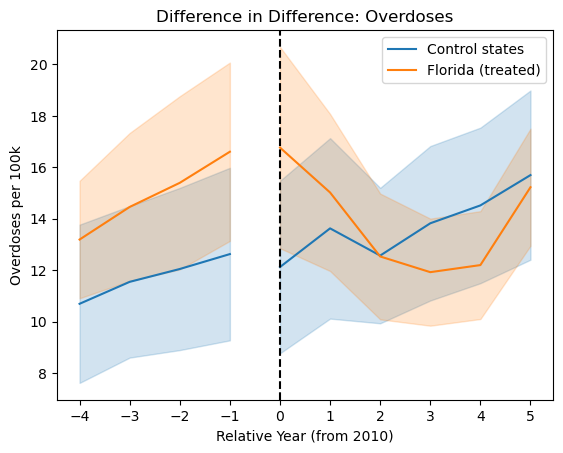

In [4]:
colors = ["tab:blue", "tab:orange"]
pre_od = opioids_states_od[opioids_states_od["year"] < 2010]
post_od = opioids_states_od[opioids_states_od["year"] >= 2010]

pre_overdose_trends = (
    pre_od.groupby(["policy_state", "relative_year"])["overdose_per_100k"]
    .agg(["mean", "std", "count"])
    .reset_index()
)
pre_overdose_trends["se"] = pre_overdose_trends["std"] / np.sqrt(
    pre_overdose_trends["count"]
)

post_overdose_trends = (
    post_od.groupby(["policy_state", "relative_year"])["overdose_per_100k"]
    .agg(["mean", "std", "count"])
    .reset_index()
)
post_overdose_trends["se"] = post_overdose_trends["std"] / np.sqrt(
    post_overdose_trends["count"]
)


fig_post, ax_post = plt.subplots()

# part of the graph before 2010
for group, d in pre_overdose_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    # mean line
    ax_post.plot(
        d["relative_year"],
        d["mean"],
        label=label,
        color=colors[group],
    )
    # SE shading
    ax_post.fill_between(
        d["relative_year"],
        d["mean"] - 1.96 * d["se"],
        d["mean"] + 1.96 * d["se"],
        color=colors[group],
        alpha=0.2,
    )

# part of the graph after 2010
for group, d in post_overdose_trends.groupby("policy_state"):
    # mean line
    ax_post.plot(
        d["relative_year"],
        d["mean"],
        color=colors[group],
    )
    # SE shading
    ax_post.fill_between(
        d["relative_year"],
        d["mean"] - 1.96 * d["se"],
        d["mean"] + 1.96 * d["se"],
        color=colors[group],
        alpha=0.2,
    )

ax_post.axvline(0, color="black", linestyle="--")
ax_post.set(
    title="Difference in Difference: Overdoses",
    xlabel="Relative Year (from 2010)",
    ylabel="Overdoses per 100k",
    xticks=sorted(opioids_states_prescriptions["relative_year"].unique()),
)
ax_post.legend()
plt.show()

## Implications

## Conclusion

## Appendices

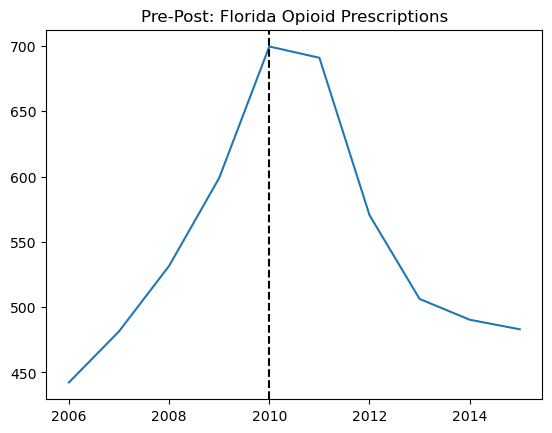

In [5]:
fl = opioids_states_prescriptions[opioids_states_prescriptions["state"] == "FLORIDA"]
mean_fl = fl.groupby("year")["prescriptions_per_1000"].mean()

plt.plot(mean_fl.index, mean_fl.values)
plt.axvline(2010, linestyle="--", color="black")
plt.title("Pre-Post: Florida Opioid Prescriptions")
plt.show()

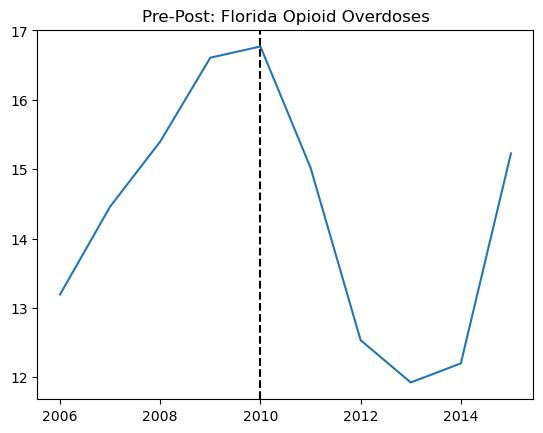

In [6]:
fl = opioids_states_od[opioids_states_od["state"] == "FLORIDA"]
mean_fl = fl.groupby("year")["overdose_per_100k"].mean()

plt.plot(mean_fl.index, mean_fl.values)
plt.axvline(2010, linestyle="--", color="black")
plt.title("Pre-Post: Florida Opioid Overdoses")
plt.show()